In [764]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [765]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [766]:
tem=pd.read_csv("data/RTE3/DEV_1.csv")
tem

,sentence1,sentence2,gold_label
0,The sale was made to pay Yukos' US$ 27.5 billi...,Baikalfinansgroup was sold to Rosneft.,YES
1,The sale was made to pay Yukos' US$ 27.5 billi...,Yuganskneftegaz cost US$ 27.5 billion.,NO
2,Loraine besides participating in Broadway's Dr...,"""Does A Tiger Have A Necktie"" was produced in ...",UNKNOWN
3,"""The Extra Girl"" (1923) is a story of a small-...","""The Extra Girl"" was produced by Sennett.",YES
4,A bus collision with a truck in Uganda has res...,30 die in a bus collision in Uganda.,YES
...,...,...,...
95,Live At Leeds (1970) is The Who's first live a...,Live At Leeds was recorded by The Who.,YES
96,"In June 2004, top Russian oil producer Lukoil ...",Lukoil earned $1 billion in 2004.,UNKNOWN
97,"Scott's execution led to outrage in Ontario, a...",Louis Riel assassinated Scott.,UNKNOWN
98,The Extra Girl (1923) is a story of a small-to...,Mabel Normand starred in The Extra Girl.,YES


In [767]:
# truck{truck,NOUN} die{die,VERB}
# resulted{result,VERB} die{die,VERB}
# por que no encontro resulted VERB die VERB
# at{at,ADV} die{die,VERB}
# least{least,ADV} die{die,VERB}
# fatalities{fatality,NOUN} die{die,VERB}
# left{leave,VERB} die{die,VERB}
# encontró Synset('leave.v.08') Synset('fail.v.04')
# further{further,ADJ} die{die,VERB}
# 21{21,NUM} die{die,VERB}
# injured{injured,ADJ} die{die,VERB}

In [768]:
print(tem.at[4,"sentence1"])
print(tem.at[4,"sentence2"])
print(tem.at[4,"gold_label"])

A bus collision with a truck in Uganda has resulted in at least 30 fatalities and has left a further 21 injured.
30 die in a bus collision in Uganda.
YES


In [769]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,wmd,CLASS
0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,0.000000,YES
1,3.998065,125.266052,2.409,1.934065,0.142042,0.233517,0,5,0.478848,6,0.569795,NO
2,8.130170,101.640274,4.419,4.032534,0.195734,0.652533,0,2,0.616979,12,0.752266,UNKNOWN
3,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,0.000000,YES
4,0.538812,142.353851,2.948,4.089147,0.218344,0.231184,0,0,0.037146,2,0.941222,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.227070,80.409866,3.418,4.006609,0.195128,0.424818,0,0,0.258356,5,0.768236,UNKNOWN
96,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,0.000000,YES
97,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,0.000000,UNKNOWN
98,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,0.000000,NO


<Axes: title={'center': 'incompatibilidad'}, xlabel='CLASS'>

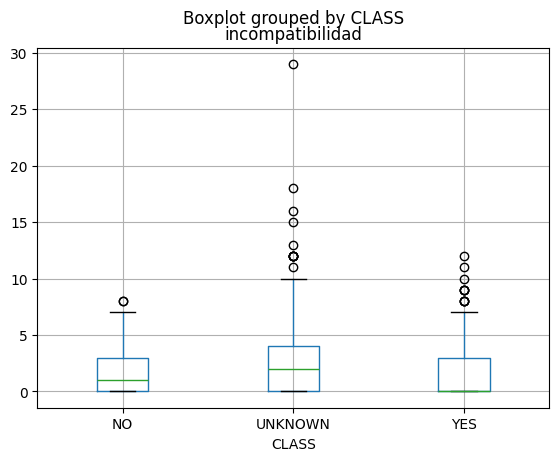

In [770]:
train.boxplot(by="CLASS",column=["incompatibilidad"])

In [771]:
train=train.reset_index(drop=True)

<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>

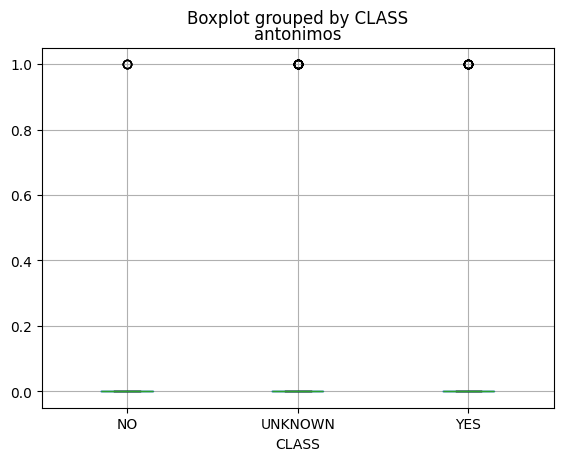

In [772]:
train.boxplot(by="CLASS",column=["antonimos"])

In [773]:
temp1=train.copy()

In [774]:
#for indexi, strings in temp1.iterrows():    
#    if "YES" ==str(strings["CLASS"].strip()):
#       train.at[indexi,"incompatibilidad"]=0

In [775]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,incompatibilidad,wmd,CLASS
0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,0.000000,YES
1,3.998065,125.266052,2.409,1.934065,0.142042,0.233517,0,5,0.478848,6,0.569795,NO
2,8.130170,101.640274,4.419,4.032534,0.195734,0.652533,0,2,0.616979,12,0.752266,UNKNOWN
3,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,0.000000,YES
4,0.538812,142.353851,2.948,4.089147,0.218344,0.231184,0,0,0.037146,2,0.941222,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.227070,80.409866,3.418,4.006609,0.195128,0.424818,0,0,0.258356,5,0.768236,UNKNOWN
796,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,0.000000,YES
797,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,0.000000,UNKNOWN
798,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,0,0.000000,NO


In [776]:
#train.boxplot(by="CLASS",column=["incompatibilidad"])

In [777]:
train=train.drop(["antonimos","distancias","suma","wmd","incompatibilidad","relaciones"],axis=1)
train

,entropias,mutual_info,m_earth,max_info_p,sim_faltantes,CLASS
0,0.000,0.000000,0.000000,0.000000,1.000000,YES
1,2.409,1.934065,0.142042,0.233517,0.478848,NO
2,4.419,4.032534,0.195734,0.652533,0.616979,UNKNOWN
3,0.000,0.000000,0.000000,0.000000,1.000000,YES
4,2.948,4.089147,0.218344,0.231184,0.037146,YES
...,...,...,...,...,...,...
795,3.418,4.006609,0.195128,0.424818,0.258356,UNKNOWN
796,0.000,0.000000,0.000000,0.000000,1.000000,YES
797,0.000,0.000000,0.000000,0.000000,1.000000,UNKNOWN
798,0.000,0.000000,0.000000,0.000000,1.000000,NO


In [778]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [779]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [780]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

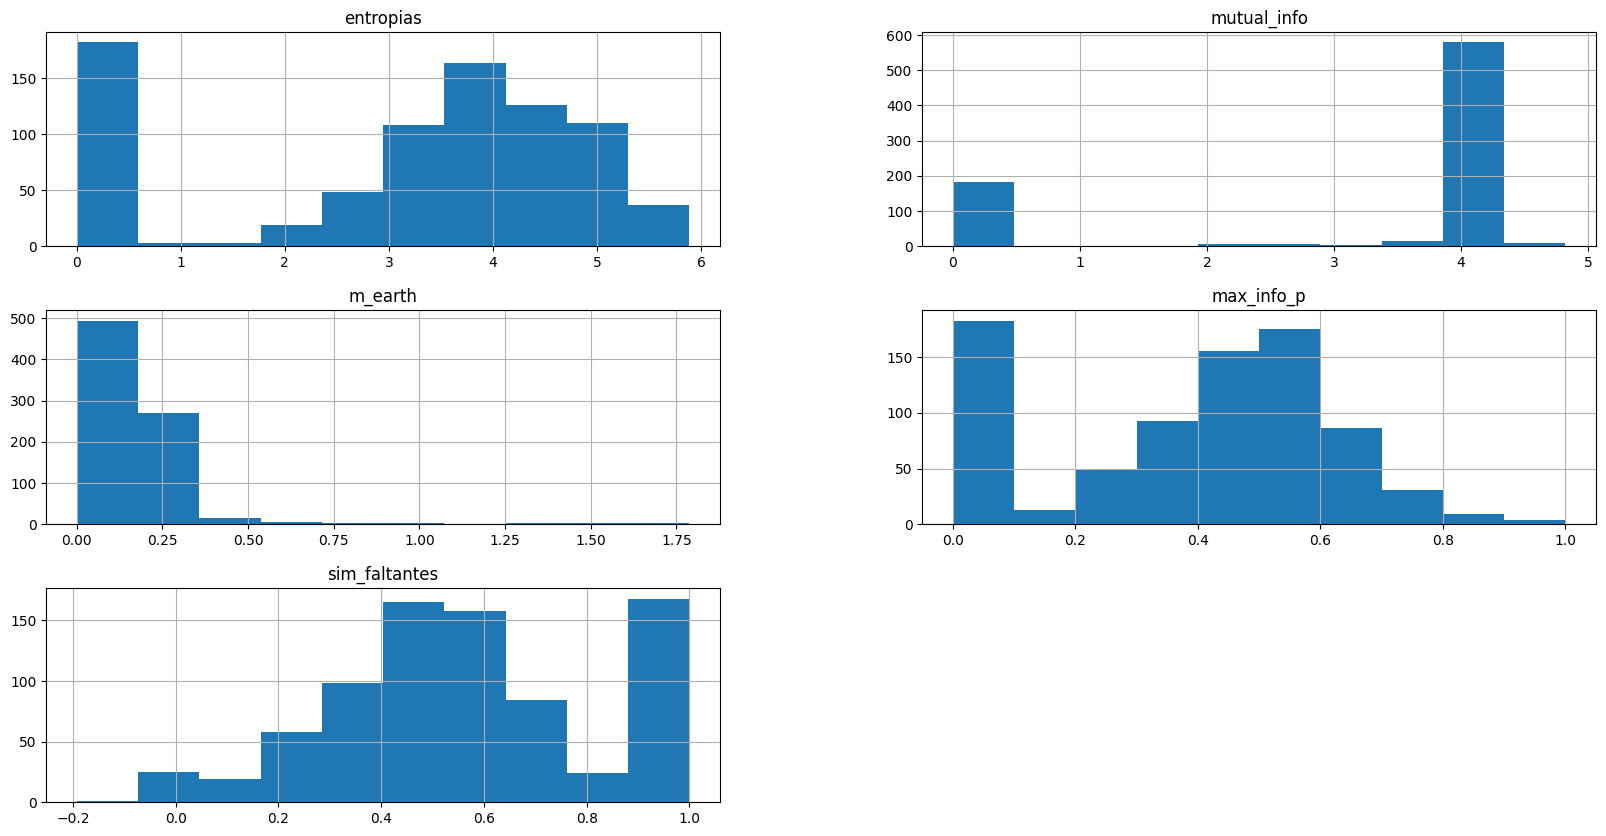

In [781]:
train.hist(figsize=(20,10))
plt.show()

In [782]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [783]:
test=test.reset_index(drop=True)

In [784]:
#test["relaciones"]=test["relaciones"]+test["antonimos"]

In [785]:
test=test.drop(["antonimos","distancias","suma","wmd","incompatibilidad","relaciones"],axis=1)
test

,entropias,mutual_info,m_earth,max_info_p,sim_faltantes,CLASS
0,3.815,2.689881e+00,0.533703,0.306524,0.457370,YES
1,3.750,4.042872e+00,0.188107,0.393066,0.338005,YES
2,0.000,7.513989e-13,1.427735,0.000000,0.000000,YES
3,0.000,0.000000e+00,0.000000,0.000000,1.000000,YES
4,3.807,3.915644e+00,0.221755,0.412710,0.413161,NO
...,...,...,...,...,...,...
795,3.572,4.022538e+00,0.357531,0.276587,0.215729,YES
796,0.000,0.000000e+00,0.000000,0.000000,1.000000,NO
797,3.892,3.976425e+00,0.173972,0.467463,0.485553,UNKNOWN
798,2.750,3.902124e+00,0.357005,0.353093,0.234342,UNKNOWN


In [786]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [787]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [788]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [789]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [790]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [791]:
X_train=np.nan_to_num(X_train)

In [792]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [793]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [794]:
X=np.nan_to_num(X)

In [795]:
model.decision_function(X)

array([ 8.95100468e-01,  3.27751226e-01, -1.17366754e-01,  8.95100468e-01,
        8.72620244e-03,  9.67408384e-01,  8.95100468e-01,  8.47232308e-01,
       -3.99249448e-01, -7.67677835e-01,  2.27558910e-01,  8.95100468e-01,
       -1.64826728e-02,  6.33867431e-01,  1.69802109e+00,  8.95100468e-01,
       -1.49882397e-01,  2.40348453e-01,  4.16364308e-01,  1.26898167e+00,
        7.00463621e-01,  6.97455309e-03,  1.07273499e+00,  5.15227259e-01,
       -1.67743003e-01, -1.95596370e-01,  4.35870307e-01,  4.53473898e-01,
       -5.16981427e-01,  1.08853479e-01,  9.95260582e-01,  1.23862535e-01,
       -2.73585551e-01,  2.79677373e-01,  3.84315005e-01,  6.39290508e-01,
        1.25525839e-01,  1.06118642e-01,  3.24271573e-01,  8.95100468e-01,
        8.95100468e-01, -2.24422813e-02, -5.70610697e-01, -2.95999353e-01,
        5.66635322e-01,  8.95100468e-01,  1.61600746e-01,  4.22109939e-01,
        8.95100468e-01,  5.70575841e-01,  4.28856323e-01,  7.90649455e-01,
       -5.65951396e-01,  

In [796]:
labels=train.columns[:-1]
labels

Index(['entropias', 'mutual_info', 'm_earth', 'max_info_p', 'sim_faltantes'], dtype='object')

In [797]:
model.classes_

array([0, 1])

In [798]:
model.coef_[0]

array([-0.89090638, -0.29453917, -0.07366094,  0.59766386, -0.22006105])

In [799]:
coeficientes=model.coef_[0]

In [800]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  3 max_info_p 0 entropias


In [801]:
n_columns=train.shape[1]-1

In [802]:
n_columns

5

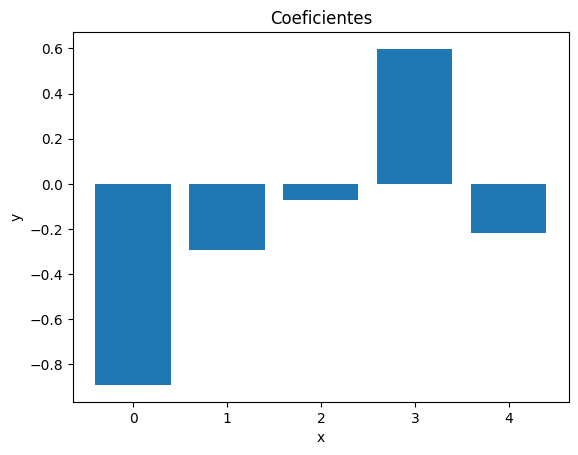

In [803]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [804]:
predictions = model.predict(X_test)

In [805]:
print(confusion_matrix(y_test, predictions))

[[223 167]
 [163 247]]


In [806]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.59
precision:  0.6
recall 0.6
f1_score:  0.6
matthews_score:  0.17


In [807]:
X_train.shape

(800, 5)

In [808]:
X_test.shape

(800, 5)

In [809]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [810]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [811]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.610000 (0.049652)


In [812]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.610000 (0.060471)


In [813]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.640000 (0.076788)


In [814]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.620000 (0.060132)


In [815]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.210000 (0.101432)


In [816]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [817]:
#linear_model

In [818]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [819]:
y_predict = model.predict(X_test)
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.57      0.58      0.57       386
           1       0.60      0.60      0.60       414

    accuracy                           0.59       800
   macro avg       0.59      0.59      0.59       800
weighted avg       0.59      0.59      0.59       800



In [820]:
explainer = shap.LinearExplainer(model,X_train,feature_names=test.columns[:-1],feature_perturbation="interventional")
shap_values = explainer(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [821]:
explainer.expected_value

0.008326731710474135

In [822]:
explainer.coef

array([-0.89090638, -0.29453917, -0.07366094,  0.59766386, -0.22006105])

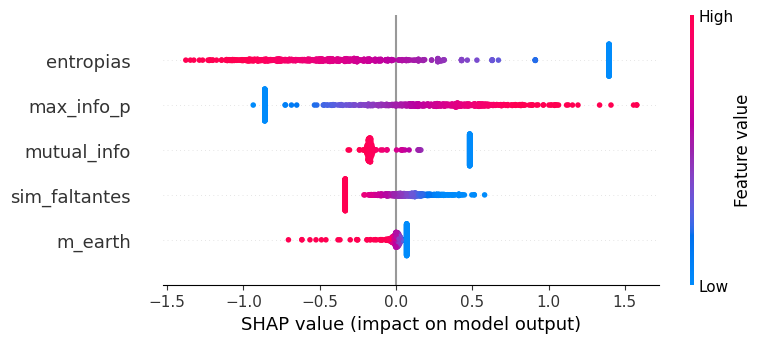

In [823]:
shap.plots.beeswarm(shap_values)

In [824]:
shap_values

.values =
array([[-4.47163614e-01,  4.05323661e-02, -1.27672846e-01,
        -1.12562498e-01,  7.16675498e-02],
       [-4.15750579e-01, -1.82223781e-01,  4.89658387e-04,
         9.84187251e-02,  1.60560082e-01],
       [ 1.39653992e+00,  4.83393874e-01, -4.59219957e-01,
        -8.59842737e-01,  4.12277828e-01],
       ...,
       [-4.84375979e-01, -1.71283874e-01,  5.73155462e-03,
         2.79792671e-01,  5.06790272e-02],
       [ 6.75268880e-02, -1.59051118e-01, -6.21451529e-02,
         9.69265287e-04,  2.37759508e-01],
       [ 1.39653992e+00,  4.83393874e-01,  7.02482517e-02,
        -8.59842737e-01, -3.32437417e-01]])

.base_values =
array([0.00832673, 0.00832673, 0.00832673, 0.00832673, 0.00832673,
       0.00832673, 0.00832673, 0.00832673, 0.00832673, 0.00832673,
       0.00832673, 0.00832673, 0.00832673, 0.00832673, 0.00832673,
       0.00832673, 0.00832673, 0.00832673, 0.00832673, 0.00832673,
       0.00832673, 0.00832673, 0.00832673, 0.00832673, 0.00832673,
       0.00832

In [825]:
#shap.plots.beeswarm(shap_values[:,0])

In [826]:
y_test[:6]

[1, 1, 1, 1, 0, 1]

In [827]:
ind = 1
shap.plots.force(shap_values[ind])

In [828]:
ind = 4
shap.plots.force(shap_values[ind])

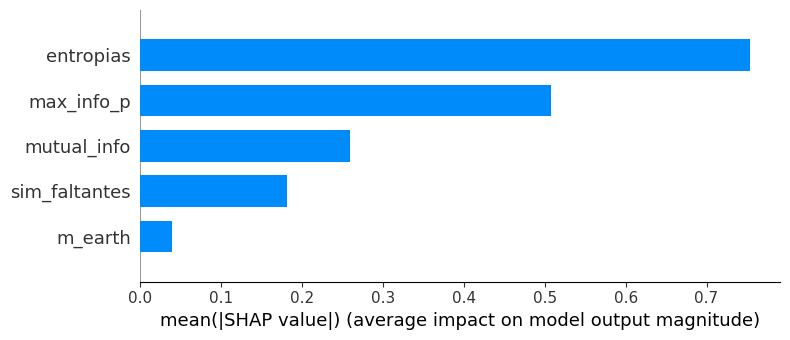

In [829]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

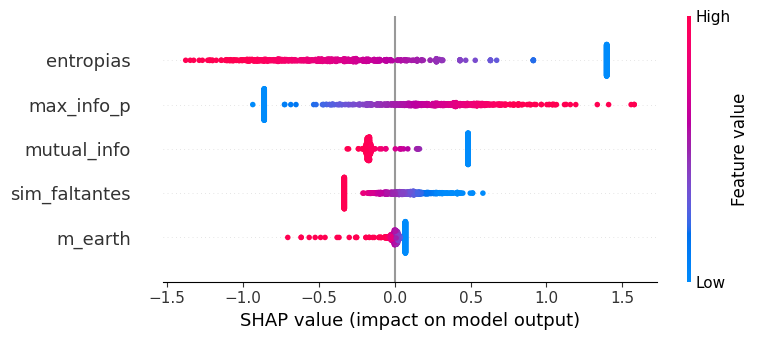

In [830]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

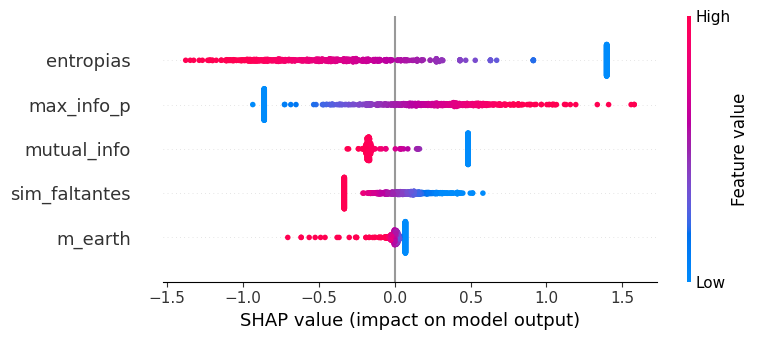

In [831]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

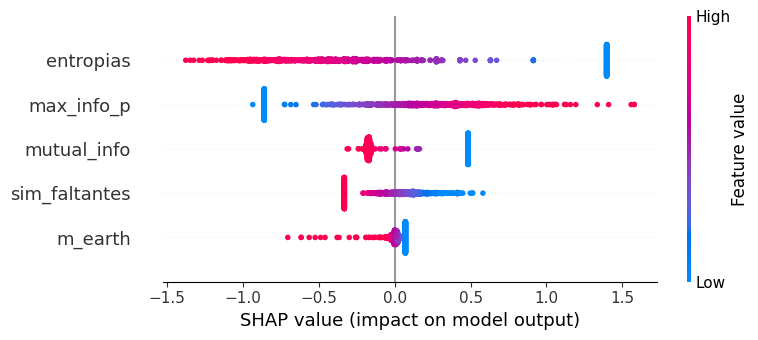

In [832]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [833]:
explainer.expected_value

0.008326731710474135

In [834]:
shap_values.shape

(800, 5)

# arbol de decisión

In [835]:
X = X_train
y = y_train

In [836]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [837]:
clf = DecisionTreeClassifier()

In [838]:

# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [839]:

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

In [840]:

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.55875


In [841]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.56
precision:  0.56
recall 0.66
f1_score:  0.61
matthews_score:  0.11


In [842]:
confusion_matrix(y_test,y_pred)

array([[175, 215],
       [138, 272]])

In [843]:
c=train.columns[:-1]

Profundidad del árbol: 19
Número de nodos terminales: 167


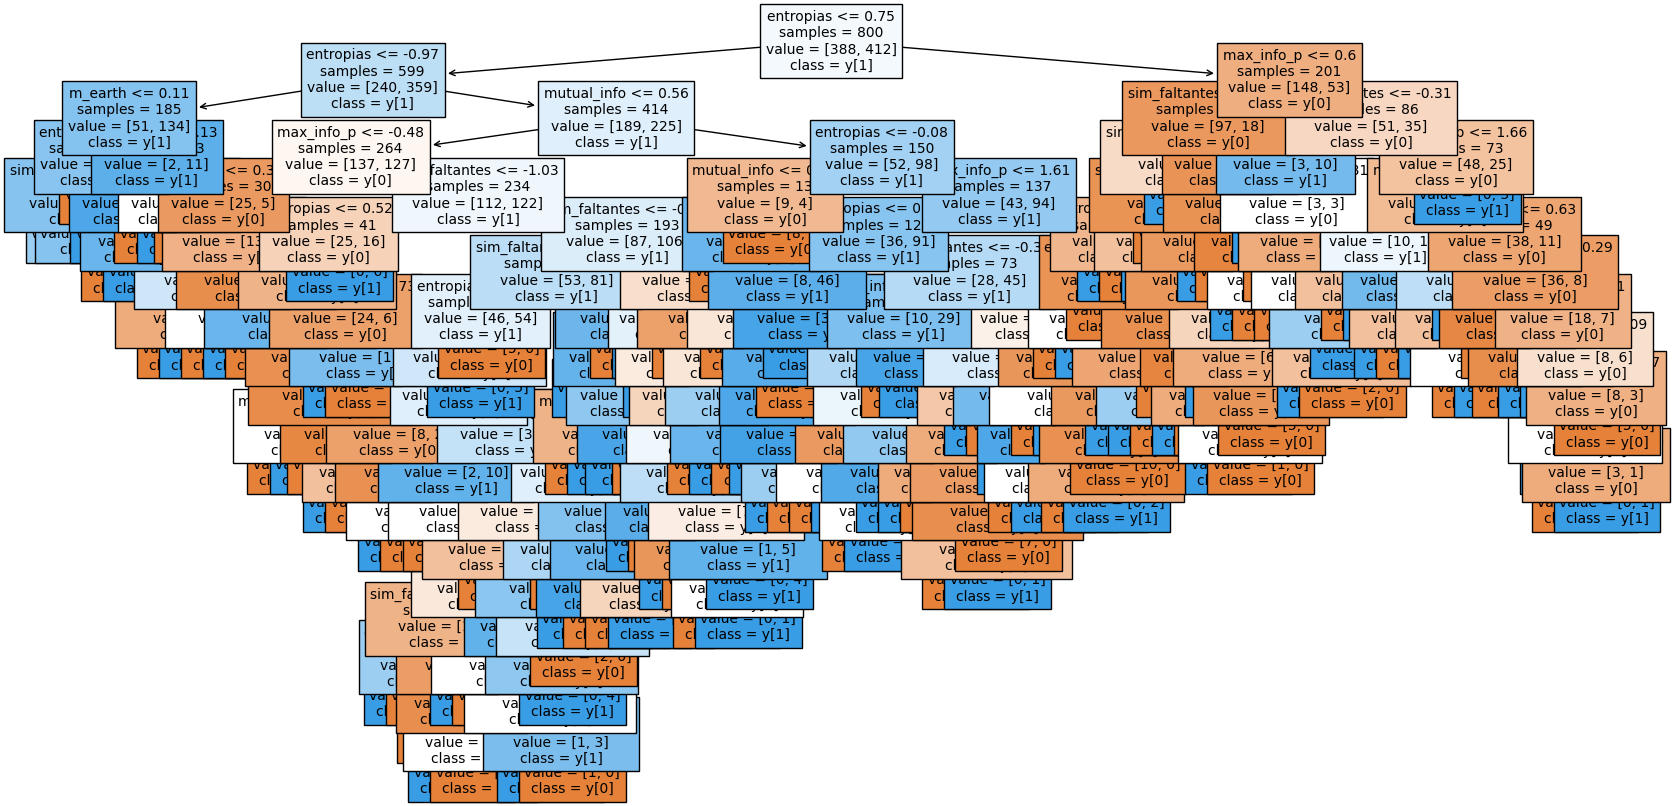

In [844]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )